# Specify directory

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('..')

# Load packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ESCellAlgorithm.ESModels import *
from ESCellAlgorithm.RobustExponentialSmoothing import *

%matplotlib inline

# Load dataset

## Load Raw Dataset

In [3]:
# Load Synthetic dataset

Y_df = pd.read_csv('DataExperiment/DataPaper/df_synthetic_paper.csv', index_col = 0)

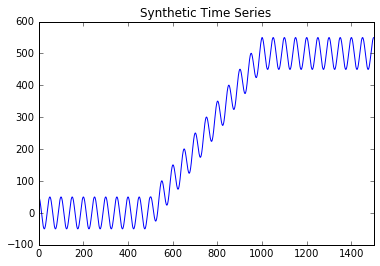

In [4]:
Y_df['ts_clean'].plot(title = 'Synthetic Time Series')

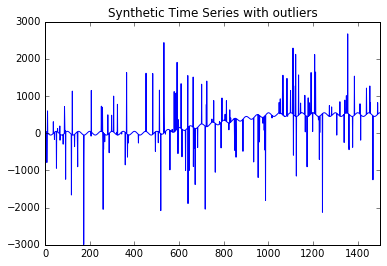

In [5]:
Y_df['ts_outlier'].plot(title = 'Synthetic Time Series with outliers')

## Load R outputs

In [6]:
# Load R results fitted

Y_R_results = pd.read_csv("""DataExperiment/DataPaper/fittedR_outlier.csv""")

# Load R Results Forecasts

Y_R_results_forecast = pd.read_csv("""DataExperiment/DataPaper/forecastR_outlier.csv""")

# Define ES Cell Model

In [7]:
# ES Cell model with Level Trend and Seasonality

ESObj = ESModels(mean_bool = True, trend_bool = True, seasonal_bool = True)
ESObj.add_seasonality(50)

## FIT ES Cell Model

In [8]:
# Fitting time series with outliers

ts_outlier = Y_df['ts_outlier'].values

RobES =  RobustES(ts_outlier,  ESMod = ESObj, window_dict = {'R' : 300, 'L' : 300})
RobES.fit(lambda_noise = 0.5, lambda_anchor = 0.5)

Building Objective
Optimizing


In [9]:
# Load results x

x_DF_plot = RobES.x_DF

# Results : Comparing R output to ES Cell output

In [10]:
# Parameter plots

fontsize_axis_label = 18
fontsize_axis_tick = 12

## Level

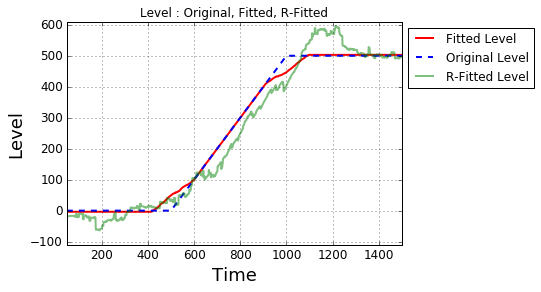

In [11]:
fig = plt.figure()
plt.title('Level : Original, Fitted, R-Fitted')
plt.xlabel("Time", fontsize = fontsize_axis_label)
plt.ylabel("Level", fontsize = fontsize_axis_label)   

fitted_L = plt.plot(x_DF_plot['L'].values, label = 'Fitted Level', alpha = 1, color = 'red', lw = 2)
original_L = plt.plot(Y_df['mean_track'].values, label = 'Original Level', alpha = 1, ls = '--', color = 'blue', lw = 2)
R_fitted_L = plt.plot(np.append(np.NaN*np.zeros(50),Y_R_results['level'].values), label = 'R-Fitted Level', alpha = 0.5 , color = 'green', lw = 2)

plt.xlim(50, RobES.N_old)
plt.ylim(Y_df['mean_track'].min() - 0.5*Y_df['mean_track'].std(), Y_df['mean_track'].max() + 0.5*Y_df['mean_track'].std())
lgd = plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))

plt.tick_params(axis = 'x', labelsize = fontsize_axis_tick)
plt.tick_params(axis = 'y', labelsize = fontsize_axis_tick)

plt.grid(True)

## Trend

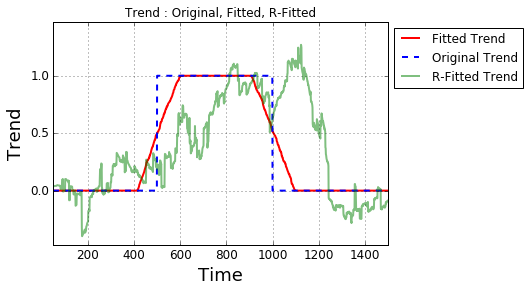

In [12]:
fig = trend_plot = plt.figure()
plt.title('Trend : Original, Fitted, R-Fitted')
plt.xlabel("Time", fontsize = fontsize_axis_label)
plt.ylabel("Trend", fontsize = fontsize_axis_label)   

fitted_B = plt.plot(x_DF_plot['B'].values, label = 'Fitted Trend', alpha= 1, color = 'red', lw = 2)
original_B = plt.plot(Y_df['trend_track'].values, label = 'Original Trend', alpha = 1, ls='--', color = 'blue', lw = 2)
R_fitted_B = plt.plot(np.append(np.NaN*np.zeros(50),Y_R_results['trend'].values), label = 'R-Fitted Trend', alpha = 0.5 , color = 'green', lw = 2)

plt.xlim(50, RobES.N_old)
plt.ylim(Y_df['trend_track'].min() - Y_df['trend_track'].std(), Y_df['trend_track'].max() + Y_df['trend_track'].std())
lgd = plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))

plt.tick_params(axis = 'x', labelsize = fontsize_axis_tick)
plt.tick_params(axis = 'y', labelsize = fontsize_axis_tick)

plt.grid(True)

## Seasonality

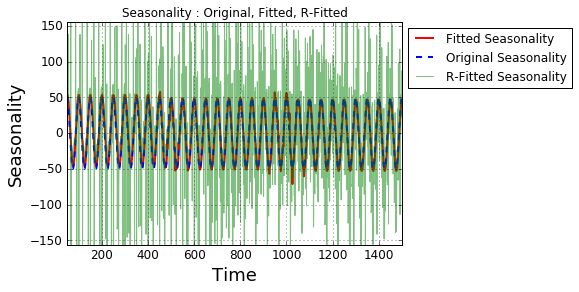

In [13]:
fig = plt.figure()
plt.title('Seasonality : Original, Fitted, R-Fitted')
plt.xlabel("Time", fontsize = fontsize_axis_label)
plt.ylabel("Seasonality", fontsize = fontsize_axis_label)   

fitted_S = plt.plot(x_DF_plot['S1'].values, label = 'Fitted Seasonality', alpha= 1, color = 'red', lw = 2)
original_S = plt.plot(Y_df['seasonality_track'].values, label = 'Original Seasonality', alpha = 1, ls='--', color = 'blue', lw = 2)
R_fitted_S = plt.plot(np.append(np.NaN*np.zeros(50),Y_R_results['season'].values), label = 'R-Fitted Seasonality', alpha = 0.5 , color = 'green', lw = 1)

plt.xlim(50, RobES.N_old)
plt.ylim(Y_df['seasonality_track'].min() - 3* Y_df['seasonality_track'].std(), Y_df['seasonality_track'].max() + 3* Y_df['seasonality_track'].std())
lgd = plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))

plt.tick_params(axis = 'x', labelsize = fontsize_axis_tick)
plt.tick_params(axis = 'y', labelsize = fontsize_axis_tick)

plt.grid(True)

## Complete Time Series

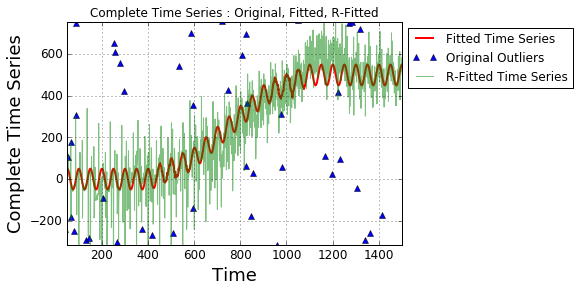

In [14]:
fig = plt.figure()
plt.title('Complete Time Series : Original, Fitted, R-Fitted')
plt.xlabel("Time", fontsize = fontsize_axis_label)
plt.ylabel("Complete Time Series", fontsize = fontsize_axis_label)   

fitted_Y = plt.plot(x_DF_plot['Yfilter'].values, label = 'Fitted Time Series', alpha= 1, color = 'red', lw = 2)
original_Y = plt.plot(Y_df[(Y_df['outlier_track'] >= 80) | (Y_df['outlier_track'] <= -80)]['ts_outlier_noise'], label = 'Original Outliers', alpha = 1 , color = 'blue', marker = '^', lw = 0)
R_fitted_Y = plt.plot(np.append(np.NaN*np.zeros(50),Y_R_results['xhat'].values), label = 'R-Fitted Time Series', alpha = 0.5 , color = 'green', lw = 1)

plt.xlim(50, RobES.N_old)
plt.ylim(Y_df['ts_outlier'].min() + 7 * Y_df['ts_outlier'].std(), Y_df['ts_outlier'].max() - 5 * Y_df['ts_outlier'].std())
lgd = plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.grid(True)

plt.tick_params(axis = 'x', labelsize = fontsize_axis_tick)
plt.tick_params(axis = 'y', labelsize = fontsize_axis_tick)

## Outlier detection

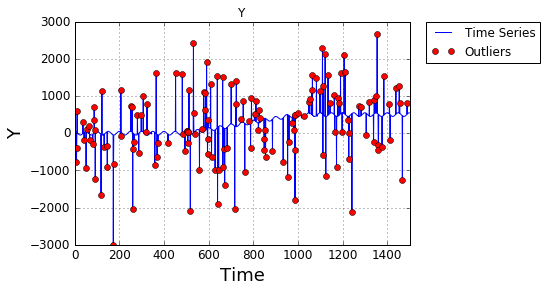

In [15]:
RobES.outlier_plot(percentiles = (5,95), save = False)

# Forecast using ES Cells

In [ ]:
RobES.simulation_predict(forecast = 100, nb_simulations = 1000, conf_int = [90, 95, 99])

('Simulation:', 0, 'out of', 1000)
('Simulation:', 1, 'out of', 1000)
('Simulation:', 2, 'out of', 1000)
('Simulation:', 3, 'out of', 1000)
('Simulation:', 4, 'out of', 1000)
('Simulation:', 5, 'out of', 1000)
('Simulation:', 6, 'out of', 1000)
('Simulation:', 7, 'out of', 1000)
('Simulation:', 8, 'out of', 1000)
('Simulation:', 9, 'out of', 1000)
('Simulation:', 10, 'out of', 1000)
('Simulation:', 11, 'out of', 1000)
('Simulation:', 12, 'out of', 1000)
('Simulation:', 13, 'out of', 1000)
('Simulation:', 14, 'out of', 1000)
('Simulation:', 15, 'out of', 1000)
('Simulation:', 16, 'out of', 1000)
('Simulation:', 17, 'out of', 1000)
('Simulation:', 18, 'out of', 1000)
('Simulation:', 19, 'out of', 1000)
('Simulation:', 20, 'out of', 1000)
('Simulation:', 21, 'out of', 1000)
('Simulation:', 22, 'out of', 1000)
('Simulation:', 23, 'out of', 1000)
('Simulation:', 24, 'out of', 1000)
('Simulation:', 25, 'out of', 1000)
('Simulation:', 26, 'out of', 1000)
('Simulation:', 27, 'out of', 1000)
('

# Fitted components vs R

In [ ]:
RobES.simulation_plot('ForecastComponent99confint', conf_int = 99, save = False, xlim = [], ylim = [])

## Forecasted components vs R

In [ ]:
fig_compare_forecast = plt.figure()
plt.title('Forecast 100 steps ahead')
plt.xlabel("Time", fontsize = fontsize_axis_label)
plt.ylabel("Forecast", fontsize = fontsize_axis_label)   

plt.plot(RobES.DF_forecast['Yfiltered']['Yfiltered_mean'].dropna().values , label = 'ES Cell Forecast', alpha= 1, color = 'red', lw = 2)
plt.plot(Y_R_results_forecast['fit'].values, label = 'R Forecast', alpha= 0.6, color = 'green', lw = 2)

plt.xlim(0, 100)

plt.tick_params(axis = 'x', labelsize = fontsize_axis_tick)
plt.tick_params(axis = 'y', labelsize = fontsize_axis_tick)

lgd = plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.grid(True)

fig_compare_forecast.savefig("""DataExperiment/PlotPaper/ForecastComparison_outlier.pdf""", dpi = 300, format = 'pdf', bbox_extra_artists = (lgd,), bbox_inches = 'tight')